In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Convolutional Neural Networks

In this lecture we will discuss deep learning for computer vision and major architecture called convolutional neural networks

#### Computer vision tasks

<img src="images/cnn/detection_segmentation.jpg" height="1000" width="1000" />

#### Classification

Classifier methods
<img src="images/cnn/cnn_classifier.png" height="1000" width="1000">

#### Segmentation

Fully convolutional model
<img src="images/cnn/fully_conv.jpeg" height="1000" width="1000">

<img src="images/cnn/localization_classification.png" height="800" width="800">

Classification loss (SoftMax with Log likelihood) + Regression loss for each coordinat

- Multi-task learning
- Weighted sum of losses $w_1 C_1 + w_2 C_2$ ($w_1 C_1(W^{l_1}, b^{l_1}, W^{l_2}, b^{l_2} \dots W^{L}, b^{L}) + w_2 C_2(w_1 C_1(W^{l_1}, b^{l_1}, W^{l_2}, b^{l_2} \dots W^{L}, b^{L})$

Keypoint detection
<img src="images/cnn/keypoint_detection.jpg" height="800" width="800">

<img src="images/cnn/face_keypoints.jpeg" height="1000" width="1000">

## Object detection

<img src="images/cnn/object_detection.png" height="600" width="600" />

#### Deep learning for computer vision

There was many approaches for image classification before 2012 but 2012 ImageNet contest winner AlexNet made a breakthrough

#### Sometimes information loss might be a good idea

As we remember from the regularization techniques, sometimes we used drouput, we loss information deliberately in order to avoid overfitting
- Less information might make model invariant for changes
- Less dimension means less computation power during the both training and inference time

How can we classify images (recognize objects in images)
- Observe different features (color, edges etc) of image
- Investigate different part of image as features

<img src="images/cnn/image_parts_2.png" height="600" width="600" />

On the other hand, in order to generalize:
- Make it size invariant
- Location invariant
- View invariant

<img src="images/cnn/trans_invar_1.png" height="600" width="600" />

How can we make model which: 
- select features and learns
- will be invariant for object size, color, background etc changes
- Will be not have enough
- Will generalize well


#### Weight shearing

First way to make model invariant for different (accptable) aspects is weights sharing
<br>
Instead of using different weight for each neuron let's repeat them values time after time

<img src="images/cnn/weight_sharing_1.png" height="600" width="600" />

How can we achieve weights sharing?
Ad restriction per layer to have copy of the weight or use other approach

#### Convolutions on matrices

Consider image as matrix:
$$\begin{align} X &= \begin{pmatrix}
           x_{11}, x_{12}, \dots, x_{1n} \\
           x_{21}, x_{22}, \dots, x_{2n} \\
           \vdots \\
           x_{m1}, x_{n2}, \dots, x_{mn} \\
         \end{pmatrix}
  \end{align}$$
  <br>
  and the smaller weights matrix:
  $$\begin{align} w &= \begin{pmatrix}
           w_{11}, w_{12}, \dots, w_{1p} \\
           w_{21}, w_{22}, \dots, w_{2p} \\
           \vdots \\
           w_{q1}, w_{q2}, \dots, w_{qp} \\
         \end{pmatrix}
  \end{align}$$

Then convolution per slice on step size $s$ which is called stride and on step $u$ in row direction and $v$ column direction, will be:
$$
\sum_{i=1}^{p}\sum_{j=1}^{q}w_{i, j}x_{i + s u, j + s v}
$$
where $u$ and $v$ are amount of steps for rows and columns respectively

For instance weights matrix:
  $$\begin{align} w &= \begin{pmatrix}
           w_{11}, w_{12}, w_{13} \\
           w_{21}, w_{22}, w_{23} \\
           w_{31}, w_{32}, w_{33} \\
         \end{pmatrix}
  \end{align}$$
<br>
and let's slide this matrix on our original matrix $X$ with step $s$ and for each step calculate:
<br>
$$
\sum_{i=1}^{3}\sum_{j=1}^{3}w_{i, j}x_{i + s u, j + s v}
$$
where $u$ and $v$ are amount of steps for rows and columns respectively

For first step we'd have:
$$
\sum_{i=1}^{3}\sum_{j=1}^{3}w_{i, j}x_{i, j}
$$
<br>
for second
$$
\sum_{i=1}^{3}\sum_{j=1}^{3}w_{i, j}x_{i + s, j + s}
$$
and etc

If stride is one, for first step:
$$
\sum_{i=1}^{3}\sum_{j=1}^{3}w_{i, j}x_{i, j}
$$
<br>
for second
$$
\sum_{i=1}^{3}\sum_{j=1}^{3}w_{i, j}x_{i + 1, j + 1}
$$
etc

Or for better understanding:
<img src="images/cnn/convolution_1.gif" height="600" width="600" />

So we calculate sum over the Hadamard product per slide:
<img src="images/cnn/convolution_2.gif" height="600" width="600" />

Stride might be different for instance here is the convolution with tride two:
<img src="images/cnn/convolution_3.gif" height="600" width="600" />

Also in order of achieve desirable size at the output, we cat pad image with zeros, or other values:
<img src="images/cnn/convolution_padding_1.gif" height="600" width="600" />

What if want to have an input with depth for convolution:
$$X \in \mathbb{R}^{h \times w \times c}$$
<br>
Our input has three dimensions: height, width and channels (depth), like RGB image

Our input is three dimensional tensor instead of matrix:
<img src="images/cnn/tensor_3d_1.png" height="600" width="600" />

Then our weights matrix should also have the same dimensions and exactly the same channels:
$$
W \in \mathbb{R}^{k \times p \times c}
$$
For our instance:
$$
W \in \mathbb{R}^{3 \times 3 \times c}
$$

We calculate convolution per slide with:
$$
\sum_{i=1}^{3}\sum_{j=1}^{3}\sum_{k=1}^{c}w_{i, j, k}x_{i + s t, j + s p, k}
$$
<br>
Note that convolution does not have strides for channels and always produces one two dimensional matrix, flattens channels

Here is the example of convolution, where input has three channels:
<img src="images/cnn/convolution_4.gif" height="600" width="600" />

#### Terminology

- Sliding window weight matrix is called convolutional kernel or very often filter
- Padding means adding border elements to image
- Step size of sliding window, for filters is called stride
- Output of the convolution (full output matrix) is called feature-map 

So we have a hyperparameter alarm
<img src="images/cnn/hp_alarm_1.jpg" height="600" width="600" />

How many additional parameters do we have?

Additional parameters:
- Kernel / filter width
- Kernel / filter height (but not depth / channels)
- Stride
- Padding

For instance if we take image and weights matrix which in convolutional neural networks is called filter:
$$\begin{align} w &= \begin{pmatrix}
       1, 0, -1 \\
       1, 0, -1 \\
       1, 0, -1 \\
     \end{pmatrix}
\end{align}$$
and run it with stride one will get edges

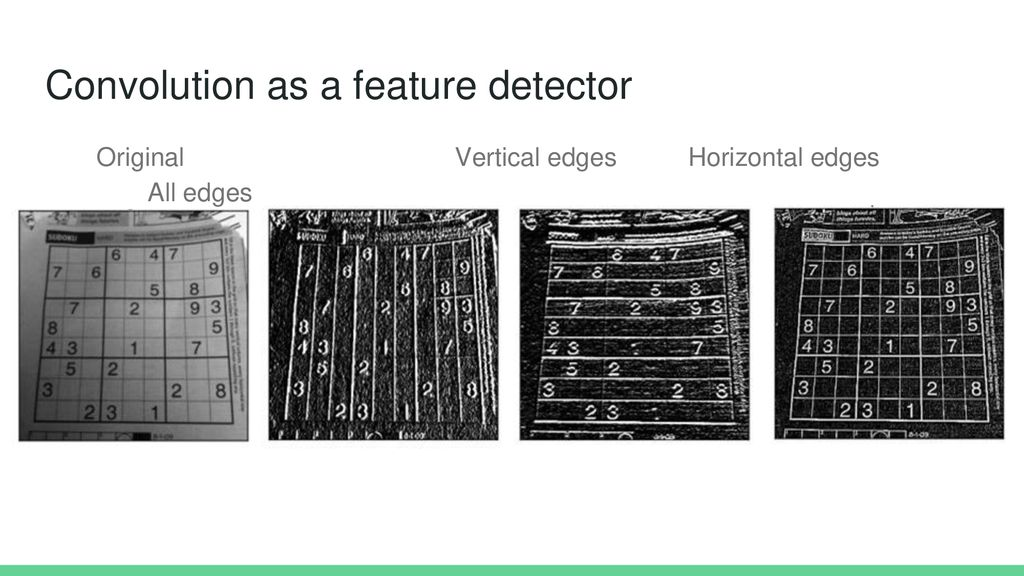

In [41]:
from IPython.display import Image
Image('images/cnn/edges.jpg')

#### Convolutional neural networs

Consider input of our model is image with height, width and channels (which might be from 1 or 3 very often)
Lets construct convolutional neural networks for each layer:
- define number of convolutional filters (weights matrices) which will generate the same amount of feature maps
- Kernel / filter width height
- Stride
- Padding

Did we note another hyperparameter?
<img src="images/cnn/hp_alarm_1.jpg" height="600" width="600" />

The amount of feature maps
<img src="images/cnn/convolutional_layer_1.jpeg" height="600" width="600" />

Did we forgot about something while we've been constructing the layer?

The activation function !!!

After each convolutional filter we'll activate output with activation function for instance ReLU and gate final feature map

#### Pooling

In order to make model more invariant for size and location of object and reduce dimension of model lets use pooling technique
- maximum pooling
- average pooling
- minimum or other pooling (don't know if anybody use it)

Maximum pooling: 
<br>
For each feature map:
$$\begin{align} F &= \begin{pmatrix}
       F_{11}, F_{12}, \dots, F_{1p} \\
       F_{21}, F_{22}, \dots, F_{2p} \\
       \vdots \\
       F_{q1}, F_{q2}, \dots, F_{qp} \\
     \end{pmatrix}
\end{align}$$
use the sliding window as we did for convolution and select maximum among elements

Example of max-pooling
<img src="images/cnn/pooling_1.png" height="600" width="600" />

So here we have the following hyperparameters:
- height of sliding window
- width of sliding window
- stride

Note that pooling layer does not flattens depth / channels. It works for each channel, on the matrix layer, so it does not reduce depth / channel dimensionality

Note that pooling layer is not learnable layer, it does not have weights and biases

So we can add max-pooling layer after the several convolution layers:
<img src="images/cnn/cnn_2.png" height="800" width="800" />

#### Fully connected layers

With convolutional and pooling layers we will end up with feature map, or even vector if we continue puting
layers.
<br>
For the classification task we need classifier, for this we add several fully connected layers at the end of our model with output probability vector

Now convolutional neural network will look like:
<img src="images/cnn/cnn_3.jpeg" height="600" width="600" />

Or for the three dimensional objects:
<img src="images/cnn/cnn_5.jpeg" height="600" width="600" />

We did not mention biases, for each layer, we can add bias after the convolution operation:
<img src="images/cnn/cnn_bias_1.png" height="600" width="600" />

So we share biases as well.
<br>
For each convolutional kernel / filter we have one bias.
<br>
For instance if we have an feature maps $32 \times 32 \times 512 $ and kernel / filter $F = 3 \times 3 \times 512$ then we'll have a $3 \times 3 \times 512 + 1$ parameters with bias considered. 

We can build our model as lego adding convolutional, pooling and fully connected layers on to each other.
But for the last layer we need to calculate dimensions

For convolutional layer output dimensions would be:
$$
H_o = \frac{H - F_h + 2 P}{S_h} + 1
$$
<br>
$$
W_o = \frac{W - F_w + 2 P}{S_w} + 1
$$
For pooling layer:
$$
W_o = H_o = \frac{W - 2 + 2 \cdot 0}{2} + 1 = \frac{W - 2}{2} + 1 = \frac{W}{2}
$$

Calculate dimensions:
$$
W_o = \frac{W - F_w + 2 P}{S_w} + 1
$$
<br>
In our case:
$$
W_o = H_o = \frac{W - 3 + 2 \cdot 1}{1} + 1 = W
$$
The same shape
For pooling layer:
$$
W_o = H_o = \frac{W - 2 + 2 \cdot 0}{2} + 1 = \frac{W - 2}{2} + 1 = \frac{W}{2}
$$

In [6]:
def cnn_dim(in_shape, ker_shape, stride, padding):
    """
    Calculate output dimension of the convolutional layer
    Args:
       in_shape: input shape - height or width
       ker_shape: kernel shape - height or width
       stride: stride
       padding: padding
    
    Returns:
        output dimension of convolutional layer
    """
    out_shape = (in_shape - ker_shape + 2 * padding) / stride + 1
    out_shape = int(out_shape)
    
    return out_shape

In [7]:
out_dim = cnn_dim(224, 3, 1, 1)
print(f'out_dim = {out_dim}')

out_dim = 224


We can manipulate size with kernel size, padding stride and above formula. 

#### Flatten vs global pooling

At the end of the convolutional neural network, we need to convert / reshape our feature map in to the vector in order to use it as an input for the linear layers
<br>
Consider our feature maps are $F \in \mathbb{R}^{7 \times 7 \times 2048}$, so we have to reshape it to the $7 \times 7 \times 2048 = 100252$ dimensional vector and if we connect this vector with the 200 dimensional layer, we'll get $7 \times 7 \times \times 500 = 50176000$ parameters

Instead of this, let's put $7 \times 7$ average or max pooling layer before the linear layer. So we'll get $F \in \mathbb{R}^{1 \times 1 \times 2048}$ dimensional output which can be reshaped (just remove additional dimensions) to the $2048$ dimensional vector and well have $2048 \times 500 = 1024000$ weights for the linear layer with 500 dimensional output

Global average pooling
<img src="images/cnn/gp_1.png" height="600" width="600" />

In general global pooling means for the $F \in \mathbb{R}^{n \times m \times c}$ using the $n \times m$ dimensional pooling which will output the $\mathbb{R}^{1 \times 1 \times c}$ dimensional value which will be reshaped in the $\mathbb{R}^{c}$ dimensional vector without any informational loss

Global pooling:
<img src="images/cnn/gp_2.png" height="600" width="600" />

Sometimes concat pooling is used, just after global average and max pooling outputs are concatenated as a one vector with $2c$ dimension

#### Convolution as the linear layer with weights sharing

We can assume convolution as the linear layer with the shared weights:
- We can consider input image tensor as a reshaped tensor
- convolutional filters / kernels as a weights for linear layer with activation

Note that pooling layer is not learnable and and we can leave it as it is, it does not take part in backpropagation

Convolution as a linear layer with the shared weights:
<img src="images/cnn/conv_as_linear_2.png" height="600" width="600" />

Convolution as linear with forward and backward:
<img src="images/cnn/conv_as_linear_3.jpg" height="600" width="600" />

So we can use all the previous techniques as for linear layer:
<img src="images/cnn/conv_as_linear_4.png" height="600" width="600" />

We can:
- Backpropagarion
- Use batch normalization
- Weights normalization
- Layer normalization
- Optimization
- Regularization

#### Popular architectures

As we mentioned before, we can construct convolutional and linear layers as LEGO, there are several popular. We can stack convolutional, pooling blocks as well and use this blocks as building material for more complex models  

For instance:
- Conv layer + Conv layer +  + batch normalization + Pool layer
- Copy input run in through the previous layer and add original input at the and
- Copy input run in Conv layers with different kernels (maybe some of them with pooling layer) and stack everything together at the output
- Use the above block and add original input at the end

Different convolutional blocks:
<img src="images/cnn/conv_blocks_1.png" height="600" width="600" />

Residual blocks
<img src="images/cnn/conv_blocks_2.png" height="600" width="600" />

Inception blocks
<img src="images/cnn/conv_blocks_3.png" height="600" width="600" />

Note that the similar approach might be used for linear layers as well, for instance residual block

#### VGG-16

VGG is the one of the easy architectures which still perform impressive

VGG-16 architecture:
<img src="images/cnn/vgg_16_1.png" height="600" width="600" />

Layers and parameters:
<img src="images/cnn/vgg_16_2.png" height="600" width="600" />

In [4]:
from torchvision.models import vgg16

model = vgg16(pretrained=True)

In [5]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

#### Inception

Inception is the model consisting with inception building blocks:
<img src="images/cnn/inception_arch_1.png" height="600" width="600" />

Here we should notice $a \times 1$ convolution:
<img src="images/cnn/inception_arch_2.png" height="600" width="600" />

With $1 \times \ 1$ architecture we just reduce depth / channels of input to the $1$
and instead of
$$h \times \ w \times c$$
<br>
we have
$$h \times \ w \times 1$$
<br>
or
$$h \times \ w$$
<br>
which will reduce our calculations $c$ times

Global average pooling is used before the linear classifier layer:
<img src="images/cnn/global_pooling_2.png" height="600" width="600" />

Auxiliary outputs:
<br>
As we saw inception has a two auxiliary outputs with general classifier layer

#### ResNet architecture

ResNet consist of residual blocks:
<img src="images/cnn/resnet_arch_1.png" height="300" width="300" />

Residual blocks:
<img src="images/cnn/resnet_arch_2.jpg" height="600" width="600" />

Different residual blocks:
<img src="images/cnn/resnet_arch_3.png" height="600" width="600" />

The output of the convolutional block might not be influential at the end of the model and too many blocks does not have an effect of the model performance:
<img src="images/cnn/resnet_arch_4.jpg" height="600" width="600" />

There are different ResNet models:
- ResNet18
- ResNet34
- ResNet50
- ResNet101
- ResNet1001

#### Inception-resnet

Inception-ResNet is an enrichment of the inception blocks with residual connections

Inception-ResNet:
<img src="images/cnn/inception_resnet_arch_1.png" height="600" width="600" />

Inception-ResNet blocks:
<img src="images/cnn/inception_resnet_arch_2.ppm" height="600" width="600" />

#### ResNeXt architecture

ResNext architecture:
<img src="images/cnn/resnext_arch_1.png" height="600" width="600" />

We can add building blocks:
<img src="images/cnn/resnext_arch_2.png" height="600" width="600" />

There are different types of ResNeXt architectures:
- ResNext50_32X4d
- ResNext50_64X4d
- ResNext101_32X4d
- ResNext101_64X4d


#### Other architectures

- DenceNet
- TraceNet
- EfficientNet

#### Choose of architecture

Depends on the:
- task 
- coputational capacity for training
- coputational capacity for test
- data
- etc
<br>
Use best practices

In [12]:
from torchvision.models import resnet50

model = resnet50(pretrained=True)

In [13]:
??model

In [15]:
from torchvision.models import resnext101_32x8d

model = resnext101_32x8d(pretrained=False)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

#### Questions

<img src="images/cnn/questions.jpg" height="600" width="600" />

#### Thank you

Slide show command -> jupyter nbconvert Convolutional_Neural_Networks.ipynb --to slides --post serve